In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def plot_histogram(x,y,title="Class Imbalance",xlabel="",ylabel = ""):
  sns.set(style="darkgrid")
  sns.barplot(x,y, alpha=0.9)
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.xticks(rotation = 90)
  plt.show()

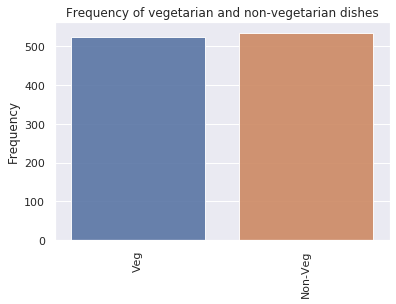

In [0]:
x = ['Veg','Non-Veg']
y = [524,535]
title = "Frequency of vegetarian and non-vegetarian dishes"
ylabel = "Frequency"
plot_histogram(x,y,title = title,ylabel = ylabel)

In [0]:
import pickle
file = open('iou_sim.pkl','rb')
iou_values = pickle.load(file)
file.close()

Text(0, 0.5, 'Similarity')

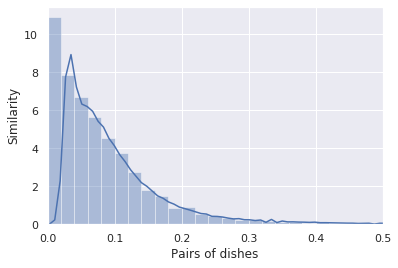

In [0]:
sns.distplot(iou_values)
plt.xlim(0,0.5)
plt.xlabel("Pairs of dishes")
plt.ylabel("Similarity")

In [4]:
%cd 'drive/My Drive'

/content/drive/My Drive


In [0]:
file = open('det_ingrs.json','r')
ingrs = json.load(file)

In [6]:
ingrs[0]

{'id': '000018c8a5',
 'ingredients': [{'text': 'penne'},
  {'text': 'cheese sauce'},
  {'text': 'cheddar cheese'},
  {'text': 'gruyere cheese'},
  {'text': 'dried chipotle powder'},
  {'text': 'unsalted butter'},
  {'text': 'all - purpose flour'},
  {'text': 'milk'},
  {'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
  {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
  {'text': 'kosher salt'},
  {'text': 'dried chipotle powder'},
  {'text': 'garlic powder'},
  {'text': '(makes about 4 cups)'}],
 'valid': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  False]}

In [0]:
unique_ingr_count = {}
for i in ingrs:
  #print(i['id'])
  valid = i['valid']
  ing = i['ingredients']
  for j in range(len(ing)):
    #print(ing[j])
    if valid[j] == False:
      continue
    if ing[j]['text'] in unique_ingr_count.keys():
      unique_ingr_count[ing[j]['text']] += 1
    else:
      unique_ingr_count[ing[j]['text']] = 1

In [0]:
mod_unique_ingr_count = {}
for i in ingrs:
  #print(i['id'])
  valid = i['valid']
  ing = i['ingredients']
  for j in range(len(ing)):
    #print(ing[j])
    if valid[j] == False:
      continue
    if ing[j]['text'] in mod_unique_ingr_count.keys():
      mod_unique_ingr_count[ing[j]['text']] += 1
    else:
      mod_unique_ingr_count[ing[j]['text']] = 1

In [0]:
sorted_ingr = sorted(unique_ingr_count,key = unique_ingr_count.get,reverse=True)

In [0]:
our_sorted = sorted(our_dataset_vocab,key = our_dataset_vocab.get,reverse=True)

In [0]:
def precision_recall_f1(true_pos,false_pos,false_neg):
  precision = true_pos/(true_pos+false_pos)
  recall = true_pos/(true_pos+false_neg)
  f1 = (2*precision*recall)/(precision+recall)
  #print(precision,recall,f1)
  return precision,recall,f1

In [0]:
def calculate(temp_ground,temp_our):
  ground = []
  for i in temp_ground:
    temp = i.split()
    for j in temp:
      ground.append(j)
  our = []
  for i in temp_our:
    temp = i.split()
    for j in temp:
      our.append(j)
  #print(ground)
  #print(our)
  true_pos = 0
  false_pos = 0
  false_neg = 0
  for i in our:
    if i in ground:
      true_pos+=1
      #print("tp",i)
    if i not in ground:
      false_pos +=1
      #print("fp",i)
  for i in ground:
    if i not in our:
      false_neg+=1
      #print("fn",i)
  #print(true_pos,false_pos,false_neg)
  p,r,f = precision_recall_f1(true_pos,false_pos,false_neg)
  return p,r,f

In [0]:
p = []
r = []
f = []
for i in range(10,200,2):
  temp = calculate(sorted_ingr[:i],our_sorted[:i])
  p.append(temp[0])
  r.append(temp[1])
  f.append(temp[2])

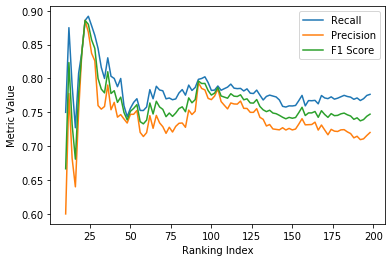

In [62]:
x = range(10,200,2)
plt.plot(x,r,label = "Recall")
plt.plot(x,p,label = 'Precision')
plt.plot(x,f,label = "F1 Score")
#plt.axis([0,1,0,1])
plt.legend(loc = 'upper right')
plt.xlabel("Ranking Index")
plt.ylabel("Metric Value")
plt.show()

In [0]:
from sklearn import metrics
def calculate_roc(temp_ground,temp_our):
  our = []
  for i in temp_our:
    temp = i.split()
    for j in temp:
      our.append(j)
  conv = []
  

In [63]:
calculate(sorted_ingr[:10],our_sorted[:10])

(0.6, 0.75, 0.6666666666666665)

In [55]:
our_sorted[:10]

['salt',
 'butter',
 'white sugar',
 'all purpose flour',
 'pepper',
 'eggs',
 'onion',
 'olive oil',
 'vanilla extract',
 'milk']

In [0]:
sorted_ingr[:10]

['salt',
 'butter',
 'sugar',
 'olive oil',
 'water',
 'eggs',
 'garlic cloves',
 'milk',
 'flour',
 'onion']

In [0]:
for i in sorted_ingr[:10]:
  print(i,unique_ingr_count[i],unique_ingr_count[i]/len(ingrs))

salt 362348 0.3518898341296663
butter 237604 0.23074622227401623
sugar 217878 0.21158955832653537
olive oil 169619 0.16472341995882375
water 158509 0.15393407916715224
eggs 151156 0.14679330303383445
garlic cloves 133413 0.12956240531406596
milk 105037 0.10200539952608476
flour 102239 0.09928815600357378
onion 101551 0.09862001320747388


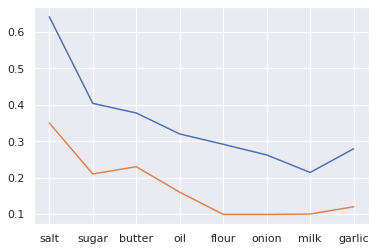

In [0]:
x = ['salt','sugar','butter','oil','flour','onion','milk','garlic']
y1 = [680/1060,428/1060,400/1060,339/1060,309/1060,278/1060,227/1060,296/1060]
y2 = [0.35,0.21,0.23,0.16,0.099, 0.099,0.10,0.12]
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

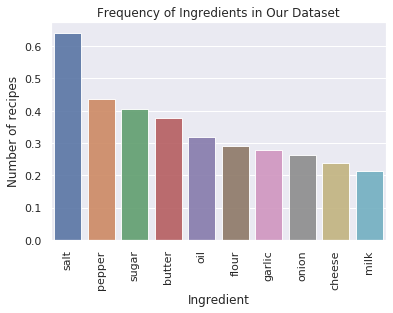

In [0]:
x = ['salt','pepper','sugar','butter','oil','flour','garlic','onion','cheese','milk']
y = [680/1060,461/1060,428/1060,400/1060,339/1060,309/1060,296/1060,278/1060,253/1060,227/1060]
title = "Frequency of Ingredients in Our Dataset"
xlabel = "Ingredient"
ylabel = "Number of recipes"
plot_histogram(x,y,title,xlabel,ylabel)

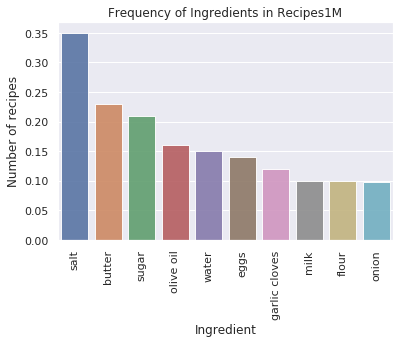

In [0]:
x = ['salt','butter','sugar','olive oil','water','eggs','garlic cloves','milk','flour','onion']
y = [0.35,0.23,0.21,0.16,0.15,0.14,0.12,0.10,0.099,0.098]
title = "Frequency of Ingredients in Recipes1M"
xlabel = "Ingredient"
ylabel = "Number of recipes"
plot_histogram(x,y,title,xlabel,ylabel)

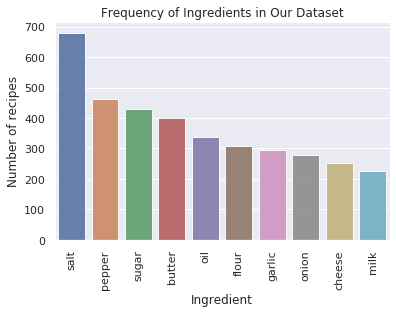

In [0]:
x = ['salt','pepper','sugar','butter','oil','flour','garlic','onion','cheese','milk']
y = [680,461,428,400,339,309,296,278,253,227]
title = "Frequency of Ingredients in Our Dataset"
xlabel = "Ingredient"
ylabel = "Number of recipes"
plot_histogram(x,y,title,xlabel,ylabel)

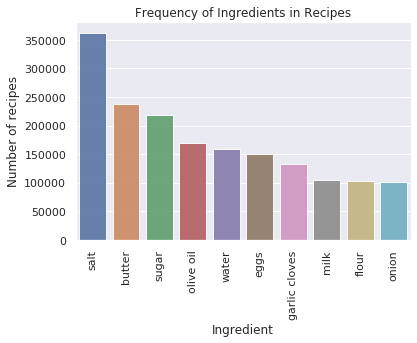

In [0]:
x = ['salt','butter','sugar','olive oil','water','eggs','garlic cloves','milk','flour','onion']
y = [362348,237604,217878,169619,158509,151156,133413,105037,102239,101551]
title = "Frequency of Ingredients in Recipes1M"
xlabel = "Ingredient"
ylabel = "Number of recipes"
plot_histogram(x,y,title,xlabel,ylabel)

In [8]:
%cd ../..

/content


In [10]:
%ls

drive/  newmodingredients.txt  sample_data/


In [0]:
file = open('newmodingredients.txt','r')
our_dataset_ingrs = []
cur = []
for i in file:
  text = i[:-1]
  if text[0] == '[':
    our_dataset_ingrs.append(cur)
    cur = []
    cur.append(text[1:])
  elif text[-1] == ']':
    cur.append(text[:-1])
  else:
    cur.append(text)
  #our_dataset_ingrs.append(i[:-1])

In [0]:
our_dataset_vocab = {}
for i in our_dataset_ingrs:
  for j in i:
    if j in our_dataset_vocab.keys():
      our_dataset_vocab[j]+=1
    else:
      our_dataset_vocab[j] = 1